In [1]:
#Adam Bloodgood

# Import required libraries.
import sys           # Read system parameters.
import pandas as pd  # Manipulate and analyze data.
import sqlite3       # Manage SQL databases.
import pickle
import numpy as np                  # Work with multi-dimensional arrays.
import matplotlib                   # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns               # Make charting easier.
import statsmodels

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- sqlite3 {}'.format(sqlite3.sqlite_version))

Libraries used in this project:
- Python 3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]
- pandas 2.2.3
- sqlite3 3.43.1


In [2]:
# Read in data from pickle file
data = pd.read_pickle("2023-24_goalie_deflection_metrics.pickle")

# Create a minimum number of shots for a goaltender to qualify for the distribution
MIN_SHOTS = 30


data = data[data['deflections'] >= MIN_SHOTS]
#data.filter(like='Shesterkin, Igor', axis = 0) #Search for specific goaltender
data # Show entire dataframe

,deflections,saves,goals,SV%,goalie_id
"Hofer, Joel",74,68,6,0.919,8480981
"Stolarz, Anthony",71,65,6,0.915,8476932
"Ullmark, Linus",124,113,11,0.911,8476999
"Hart, Carter",62,56,6,0.903,8479394
"Annunen, Justus",40,36,4,0.900,8481020
...,...,...,...,...,...
"DeSmith, Casey",68,54,14,0.794,8479193
"Georgiev, Alexandar",159,126,33,0.792,8480382
"Forsberg, Anton",70,55,15,0.786,8476341
"Soderblom, Arvid",98,76,22,0.776,8482821


Text(0, 0.5, 'Number of Goaltenders')

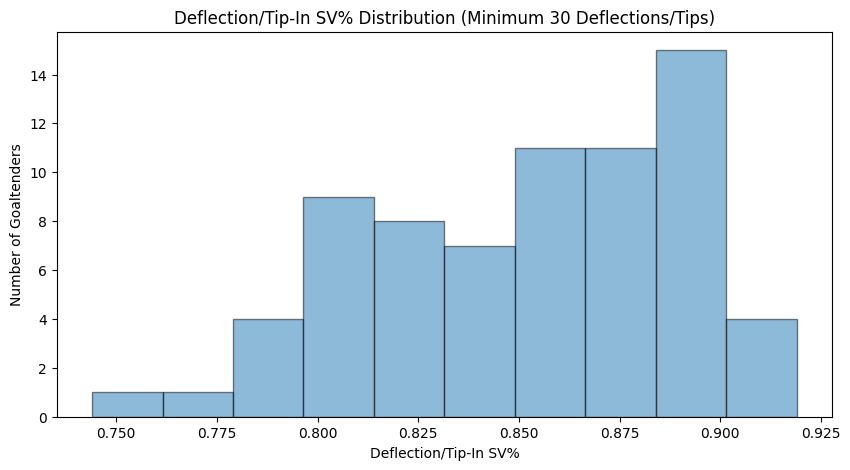

In [3]:
# Print histogram of distribution
data['SV%'].hist(figsize = (10,5), alpha = 0.5,
                        edgecolor = 'black', grid = False)
plt.title(f"Deflection/Tip-In SV% Distribution (Minimum {MIN_SHOTS} Deflections/Tips)")
plt.xlabel("Deflection/Tip-In SV%")
plt.ylabel("Number of Goaltenders")

Text(0.5, 1.0, 'Deflections/Tip-Ins VS Goals')

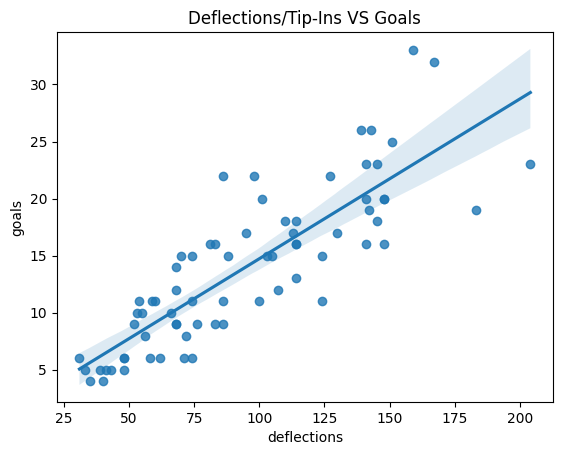

In [4]:
# Show scatter plot with line of best fit
sns.regplot(data = data, x = 'deflections', y = 'goals')
plt.title("Deflections/Tip-Ins VS Goals")

In [5]:
# Show statistical numbers of distribution
data['SV%'].describe()

count    71.000000
mean      0.851915
std       0.038303
min       0.744000
25%       0.819500
50%       0.858000
75%       0.885000
max       0.919000
Name: SV%, dtype: float64